<a href="https://colab.research.google.com/github/dasunkasthury/MLFaceRecognition/blob/main/FaceRecog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Setting up data

In [1]:
!gdown --id 1lpY3RBhUyds9-VKlGFlch92L5q5nYSBo
!mkdir data
!unzip '/content/Extracted_imges.zip' -d '/content/data/'
!rm -r Extracted_imges.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/Extracted_imges/Minus/469.jpg  
  inflating: /content/data/Extracted_imges/Minus/47.jpg  
  inflating: /content/data/Extracted_imges/Minus/470.jpg  
  inflating: /content/data/Extracted_imges/Minus/471.jpg  
  inflating: /content/data/Extracted_imges/Minus/472.jpg  
  inflating: /content/data/Extracted_imges/Minus/473.jpg  
  inflating: /content/data/Extracted_imges/Minus/474.jpg  
  inflating: /content/data/Extracted_imges/Minus/475.jpg  
  inflating: /content/data/Extracted_imges/Minus/476.jpg  
  inflating: /content/data/Extracted_imges/Minus/477.jpg  
  inflating: /content/data/Extracted_imges/Minus/478.jpg  
  inflating: /content/data/Extracted_imges/Minus/479.jpg  
  inflating: /content/data/Extracted_imges/Minus/48.jpg  
  inflating: /content/data/Extracted_imges/Minus/480.jpg  
  inflating: /content/data/Extracted_imges/Minus/481.jpg  
  inflating: /content/data/Extracted_imges/Minus/482.jpg  
  infla

In [6]:
## Data processing pipelines

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import matplotlib as plt
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
import numpy as np


In [3]:
data_gen = ImageDataGenerator(shear_range=0.2, zoom_range=0.2, rescale=1./255, validation_split=0.2)
path_to_data = '/content/data/Extracted_imges'

training_set = data_gen.flow_from_directory(path_to_data,(128,128),color_mode='grayscale', subset="training")
testing_set = data_gen.flow_from_directory(path_to_data,(128,128),color_mode='grayscale', subset="validation")

#training_set = data_gen.flow_from_directory(path_to_data,(128,128), subset="training")
#testing_set = data_gen.flow_from_directory(path_to_data,(128,128), subset="validation")

Found 6924 images belonging to 13 classes.
Found 1725 images belonging to 13 classes.


In [24]:
print(training_set.class_indices)
print(training_set.batch_size)
labels = ["Add","Div","Eight","Five","Four","Minus","Multiply","Nine","One","Seven","Six","Three","Two"]

{'Add': 0, 'Div': 1, 'Eight': 2, 'Five': 3, 'Four': 4, 'Minus': 5, 'Multiply': 6, 'Nine': 7, 'One': 8, 'Seven': 9, 'Six': 10, 'Three': 11, 'Two': 12}
32


Visualizing data

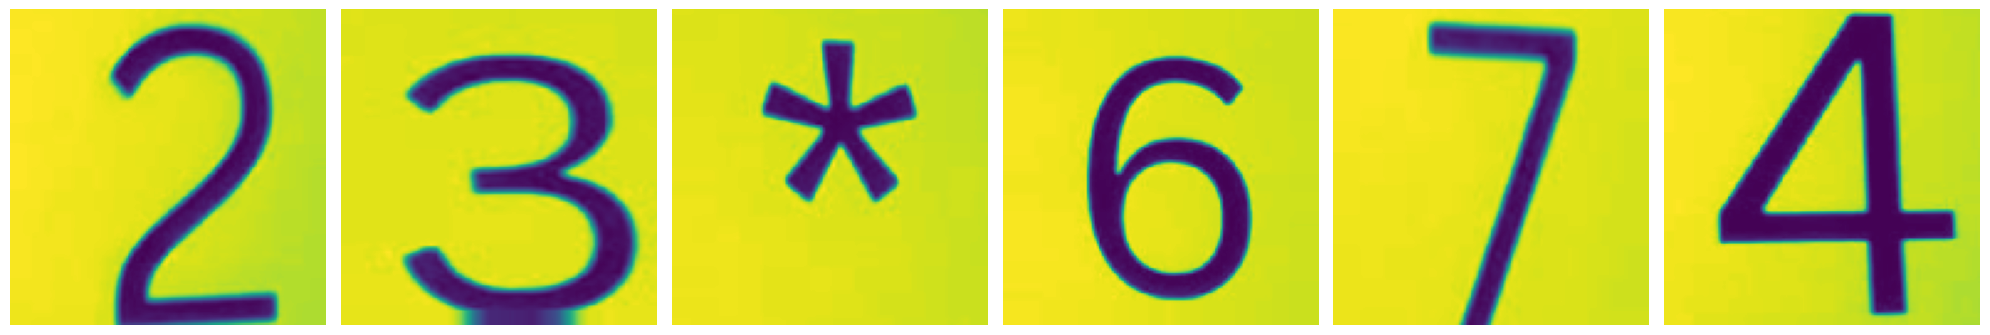

In [5]:
def plotImages(image_arr):
  fig, axes = plt.subplots(1, 6, figsize=(20,20))
  for img, ax in zip(image_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()
training_images, _ = next(training_set)
plotImages(training_images[:6])

Model Implementation

In [6]:
# initialising the CNN
face_recognition_model = Sequential()

# convolution to extract features from images
face_recognition_model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# max pooling to get max / largest values in feature map
# down sampling technique to get the most present features
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))

# more convolution and max pooling layers
face_recognition_model.add(Conv2D(64, (3, 3), activation = 'relu'))
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))
face_recognition_model.add(Conv2D(128, (3, 3), activation = 'relu'))
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))
face_recognition_model.add(Conv2D(256, (3, 3), activation = 'relu'))
face_recognition_model.add(MaxPooling2D(pool_size = (2, 2)))

# flattening is converting the data into a 1-dimensional array
face_recognition_model.add(Flatten())
face_recognition_model.add(Dense(units = 1024, activation = 'relu'))
face_recognition_model.add(Dense(units = 13, activation = 'softmax'))

# compiling the CNN
face_recognition_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# show summary of the created model
face_recognition_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 13)                  │          13,325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,839,373 (37.53 MB)

 Trainable params: 9,839,373 (37.53 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = face_recognition_model.fit(training_set, epochs=15, validation_data=testing_set, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2))

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


217/217 ━━━━━━━━━━━━━━━━━━━━ 33s 123ms/step - accuracy: 0.7243 - loss: 0.8431 - val_accuracy: 0.9867 - val_loss: 0.0530
Epoch 2/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - accuracy: 0.9881 - loss: 0.0419 - val_accuracy: 0.9867 - val_loss: 0.0394
Epoch 3/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9936 - loss: 0.0232 - val_accuracy: 0.9901 - val_loss: 0.0342
Epoch 4/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 21s 87ms/step - accuracy: 0.9940 - loss: 0.0210 - val_accuracy: 0.9948 - val_loss: 0.0238
Epoch 5/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.9961 - loss: 0.0101 - val_accuracy: 0.9942 - val_loss: 0.0189
Epoch 6/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.9919 - loss: 0.0309 - val_accuracy: 0.9925 - val_loss: 0.0206
Epoch 7/15
217/217 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9972 - loss: 0.0116 - val_accuracy: 0.9907 - val_loss: 0.0419
Epoch 7: early stopping


In [11]:
face_recognition_model.save('/content/fr_model.keras')
face_recognition_model.save_weights('/content/fr_model.weights.h5')


Testing model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Nine


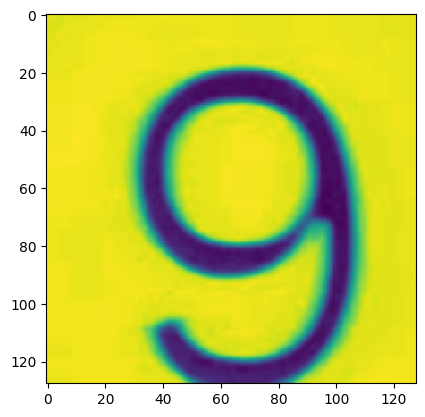

In [48]:
testing_image = image.load_img('/content/data/Extracted_imges/Nine/95.jpg', color_mode='grayscale', target_size=(128,128))
plt.imshow(testing_image)

testing_image = image.img_to_array(testing_image)
testing_image = np.expand_dims(testing_image, axis=0)


#print(testing_image.shape)

prediction_result = face_recognition_model.predict(testing_image)

print(labels[np.argmax(prediction_result)])

